In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Лабораторная работа №1. 
## Поиск мостов в графе.

Задача:    
Пусть дан неориентированный граф G = (V, E), где V - множество его вершин, E - множество его ребер. Мостом (2-мостом) называется такое ребро (пара ребер), удаление которого увеличивает число компонент связности графа на одну. Требуется найти все мосты и 2-мосты в заданном графе.

### Детерминированный алгоритм   
В основе данного алгоритма лежит обход графа в глубину и запоминание времени посещения вершин. Данный алгоритм находит только мосты в графе и работает за время О(V+E). 

### Рандомизированный алгоритм    
Применяя этот алгоритм, мы находим остовное дерево графа и присваимаем недревесным ребрам случайные веса из множества {0,1}. Затем, с помощью логической операции XOR, мы присваем древесным ребрам веса. Ребра, вес которых после присваивания равен 0, являются мостами. Ребра с одинаковыми весами (кроме 0) являются 2-мостами. Вероятность правильного определения веса для ребра при одном проходе алгоритма равна 1/2. Поэтому необходимо больше проход, чтобы повысить точность. Для этого используются различные типы данных (8, 16, 32, 64 ... битные) в одном проходе, что эквивалетно многоразовому повторению алгоритма.  
    
Данный алгоритм осуществляется за один проход графа в глубину и сортировку весов, то есть время его работы О(V+E) + время работы сортировки. 

Чтобы сравнить точность алгоритма, мы берем 8, 16, 32, 64 - битные типы данных.   
Чтобы сравнить скорость работы, мы берем Radix-сортировку, Bucket-сортировку и Std::Sort (Quick-сортировка). 

### Stress testing 

### Эксперименты и сравнение работы алгоритмов

In [6]:
data = pd.read_csv('Out_32b.csv')
print(data.shape)
data

(40, 7)


,NumVert,NumEdges,DFS,Rand,Rand_Radix,Rand_Bucket,Rand_Sort
0,100,50,2.800000e+07,11000000.0,6.200000e+07,3.800000e+07,2.400000e+07
1,200,100,8.000000e+07,28000000.0,1.150000e+08,9.100000e+07,5.900000e+07
2,300,150,7.900000e+07,31000000.0,1.310000e+08,1.020000e+08,6.700000e+07
3,400,200,7.900000e+07,38000000.0,1.430000e+08,1.150000e+08,7.800000e+07
4,500,250,9.400000e+07,46000000.0,1.690000e+08,1.440000e+08,9.700000e+07
5,600,300,1.220000e+08,54000000.0,1.910000e+08,1.650000e+08,1.130000e+08
6,700,350,1.750000e+08,81000000.0,2.880000e+08,2.510000e+08,1.800000e+08
7,800,400,1.590000e+08,81000000.0,2.850000e+08,2.460000e+08,1.650000e+08
8,900,450,2.000000e+08,94000000.0,3.240000e+08,2.740000e+08,1.950000e+08
9,1000,500,2.320000e+08,111000000.0,3.630000e+08,3.260000e+08,2.350000e+08


Text(0, 0.5, 'time')

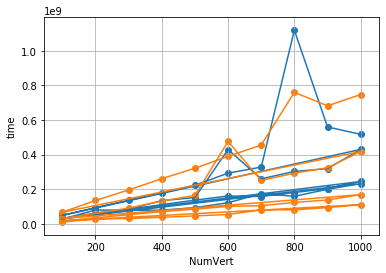

In [8]:
plt.plot(data['NumVert'], data['DFS'], label='DFS')
plt.plot(data['NumVert'], data['Rand'], label='RAND')
plt.grid()
plt.scatter(data['NumVert'], data['DFS'])
plt.scatter(data['NumVert'], data['Rand'])
# plt.ylim(0, 1)
plt.xlabel('NumVert')
plt.ylabel('time')
# plt.legend(handles=[dfs, rand])

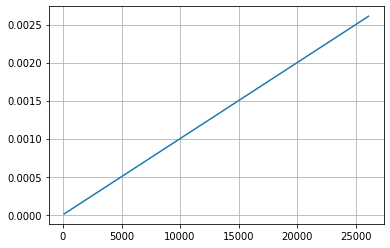

In [92]:
plt.plot(data['NumVert'], 0.0000001 * data['NumVert'])
plt.grid()
# plt.ylim(0, 2500)


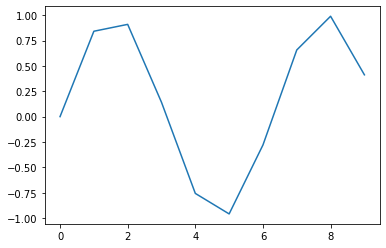

In [4]:
x = range(10)
y = np.sin(x)
plt.plot(x, y)

### Real-life графы

http://users.diag.uniroma1.it/challenge9/download.shtml

In [12]:
f = open('USA-road-d.NY.gr')
s = f.read()
s = s.split('\na ')
del s[0]
for i in range(len(s)):
    s[i] = s[i].split(' ')   
s

[['1', '2', '803'],
 ['2', '1', '803'],
 ['3', '4', '158'],
 ['4', '3', '158'],
 ['5', '6', '774'],
 ['6', '5', '774'],
 ['7', '8', '1531'],
 ['8', '7', '1531'],
 ['9', '10', '1673'],
 ['10', '9', '1673'],
 ['9', '11', '1400'],
 ['11', '9', '1400'],
 ['1', '12', '842'],
 ['12', '1', '842'],
 ['2', '13', '591'],
 ['13', '2', '591'],
 ['14', '15', '1371'],
 ['15', '14', '1371'],
 ['16', '17', '1659'],
 ['17', '16', '1659'],
 ['18', '19', '1012'],
 ['19', '18', '1012'],
 ['20', '21', '1226'],
 ['21', '20', '1226'],
 ['20', '22', '1265'],
 ['22', '20', '1265'],
 ['23', '24', '2707'],
 ['24', '23', '2707'],
 ['25', '26', '520'],
 ['26', '25', '520'],
 ['27', '28', '783'],
 ['28', '27', '783'],
 ['29', '30', '518'],
 ['30', '29', '518'],
 ['31', '32', '3412'],
 ['32', '31', '3412'],
 ['33', '34', '1994'],
 ['34', '33', '1994'],
 ['33', '35', '337'],
 ['35', '33', '337'],
 ['36', '37', '363'],
 ['37', '36', '363'],
 ['38', '39', '1018'],
 ['39', '38', '1018'],
 ['40', '41', '392'],
 ['41', '4

In [19]:
import csv
with open('NYgraph.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for i in range(0, len(s)):
        writer.writerow([s[i][0], s[i][1]])


https://www.cs.utah.edu/~lifeifei/SpatialDataset.htm

In [33]:
fil = open('california.txt')
clf = fil.read()
clf = clf.split('\n')
for i in range(len(clf)):
    clf[i] = clf[i].split(' ')   
clf

[['0', '0', '1', '0.002025'],
 ['1', '0', '6', '0.005952'],
 ['2', '1', '2', '0.014350'],
 ['3', '2', '3', '0.012279'],
 ['4', '3', '4', '0.011099'],
 ['5', '5', '6', '0.006157'],
 ['6', '5', '7', '0.001408'],
 ['7', '5', '8', '0.012008'],
 ['8', '7', '265', '0.003213'],
 ['9', '8', '298', '0.005382'],
 ['10', '9', '10', '0.012940'],
 ['11', '9', '36', '0.018695'],
 ['12', '9', '37', '0.002948'],
 ['13', '10', '11', '0.013238'],
 ['14', '11', '12', '0.028027'],
 ['15', '12', '13', '0.016322'],
 ['16', '13', '14', '0.032190'],
 ['17', '14', '15', '0.009105'],
 ['18', '15', '16', '0.012708'],
 ['19', '16', '17', '0.026648'],
 ['20', '17', '18', '0.009636'],
 ['21', '18', '19', '0.014209'],
 ['22', '19', '20', '0.008261'],
 ['23', '20', '21', '0.011507'],
 ['24', '21', '22', '0.008586'],
 ['25', '22', '23', '0.011969'],
 ['26', '23', '24', '0.011713'],
 ['27', '24', '25', '0.011671'],
 ['28', '25', '26', '0.007185'],
 ['29', '26', '27', '0.010523'],
 ['30', '27', '28', '0.004280'],
 ['31'

In [38]:
with open('California.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(clf)-1):
        writer.writerow([clf[i][1], clf[i][2]])

In [43]:
max = 0
for i in range(len(clf)-1):
    if (int(clf[i][1]) > max):
        max = int(clf[i][1])
    if (int(clf[i][2]) > max):
        max = int(clf[i][1])   
max

21045